## Odpiranje dokumentov in osnovno predprocesiranje

Začneva z odpiranjem dokumentov, ki sva jih pripravila - združeni vsi podatkovni okvirji v enega, urejeni glede na "class". Pred pred-procesiranjem iz podatkovnega okvirja izločiva vse nekategorizirane maile in ohraniva samo označene. 

V tej roki pred-procesiranja besedila očistiva:
- Slovenske "stop words" iz NLTK korpusa
- besedilo vseh mailov pretvoriva v lower-case pisavo
- z uporabo ReGexa izločiva e-mail naslove
- iz besedil izločiva ločila 
- izločiva števke in enočrkovne nize (single-charatcer strings)
- izločiva nize daljše od 16 znakov (prosledica prejšnjih korakov so določene dolge, nepomenske besede)
- tokenizacija z word_tokenizer-jem (NLTK)

In [1]:
import pandas as pd
import os
import nltk

In [2]:
df = pd.read_csv ("zdruzeni_podatki.csv")

In [3]:
#SPREMENI NaN V CLASS "BREZ"
df = df.fillna("Brez")
#VRŽI IZ DF VSE, KI IMAJO CLASS "BREZ"
df = df.loc[~df["class"].str.contains("Brez")]
df

,Unnamed: 0,class,content
0,0,Asistenca,"Obveščamo vas, da je od kreiranja primera CUDV..."
1,1,Asistenca,"Obveščamo vas, da je od kreiranja primera DAVI..."
2,2,Asistenca,vv\n\nOd: arc@assist-austria.com <arc@assist-a...
3,3,Asistenca,"Obveščamo vas, da je od kreiranja primera ALEŠ..."
4,4,Asistenca,"Obveščamo vas, da je od kreiranja primera SUMM..."
...,...,...,...
36124,36124,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content..."
36125,36125,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content..."
36126,36126,Življenje,Pozdravljeni\nProsim za podatek kdaj lahko dob...
36127,36127,Življenje,"Pozdravljeni,\n\ndo 31.12. mi je moj prejšnji ..."


In [4]:
df = df.drop(columns=["Unnamed: 0"])

In [5]:
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktTrainer


In [6]:
from nltk.corpus import stopwords
print(stopwords.fileids())

['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [7]:
#DETERMINE SLOVENE STOPWORDS

slo_stopwords = stopwords.words("slovene")

In [8]:
#REMOVE STOPWORDS FROM SLOVENE BASE

df['no_stopwords'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (slo_stopwords)]))
print(df)

           class                                            content  \
0      Asistenca  Obveščamo vas, da je od kreiranja primera CUDV...   
1      Asistenca  Obveščamo vas, da je od kreiranja primera DAVI...   
2      Asistenca  vv\n\nOd: arc@assist-austria.com <arc@assist-a...   
3      Asistenca  Obveščamo vas, da je od kreiranja primera ALEŠ...   
4      Asistenca  Obveščamo vas, da je od kreiranja primera SUMM...   
...          ...                                                ...   
36124  Življenje  <html><head>_x000D_\n<meta http-equiv="Content...   
36125  Življenje  <html><head>_x000D_\n<meta http-equiv="Content...   
36126  Življenje  Pozdravljeni\nProsim za podatek kdaj lahko dob...   
36127  Življenje  Pozdravljeni,\n\ndo 31.12. mi je moj prejšnji ...   
36128  Življenje  Pozdravljeni.Zaradi izrednih razmer v trenutni...   

                                            no_stopwords  
0      Obveščamo vas, kreiranja primera CUDV ČRNA NA ...  
1      Obveščamo vas, kreiran

In [9]:
#LOWER-CASING NO_STOPWORDS COLUMN

df["no_stopwords"] = df["no_stopwords"].str.lower()

In [10]:
#STRIPPING NO_STOPWORD COLUMN

df["no_stopwords"] = df["no_stopwords"].apply(lambda x: x.strip())

In [11]:
import re

In [12]:
#REMOVING EMAIL ADRESSES FROM STRINGS USING REGEX

df['no_stopwords'] = df['no_stopwords'].apply(lambda x: re.sub('\S*@\S*\s?', '' , x))

In [13]:
import string

In [14]:
#REMOVING PUNCTUATION

df['no_stopwords'] = df['no_stopwords'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ' , x))

In [15]:
#REMOVING DIGITS FROM NO_STOPWORDS

df['no_digits'] = df['no_stopwords'].apply(lambda x: re.sub('[\d]', "" , x))

In [16]:
#REMOVING SINGLE CHARACTERS FROM NO_DIGITS

df['no_digits'] = df['no_digits'].apply(lambda x: re.sub(r"\b[a-zA-Z]\b", "" , x))

In [17]:
#REMOVING WORDS LONGER THAN 16 CHARACTERS FROM NO_DIGITS

df['no_digits'] = df['no_digits'].apply(lambda x: re.sub(r'\b\w{16,100}\b', "" , x))

In [18]:
#TOKENIZING

#df['no_stopwords']=df['no_stopwords'].apply(str)
df['tokenized'] = df.apply(lambda row: 
                               nltk.word_tokenize(row['no_digits']), 
                               axis=1)

In [19]:
df

,class,content,no_stopwords,no_digits,tokenized
0,Asistenca,"Obveščamo vas, da je od kreiranja primera CUDV...",obveščamo vas kreiranja primera cudv črna na ...,obveščamo vas kreiranja primera cudv črna na ...,"[obveščamo, vas, kreiranja, primera, cudv, črn..."
1,Asistenca,"Obveščamo vas, da je od kreiranja primera DAVI...",obveščamo vas kreiranja primera david seč v...,obveščamo vas kreiranja primera david seč v...,"[obveščamo, vas, kreiranja, primera, david, se..."
2,Asistenca,vv\n\nOd: arc@assist-austria.com <arc@assist-a...,vv od poslano četrtek 07 januar 2021 21 59...,vv od poslano četrtek januar za dc za...,"[vv, od, poslano, četrtek, januar, za, dc, zad..."
3,Asistenca,"Obveščamo vas, da je od kreiranja primera ALEŠ...",obveščamo vas kreiranja primera aleš ruter ...,obveščamo vas kreiranja primera aleš ruter ...,"[obveščamo, vas, kreiranja, primera, aleš, rut..."
4,Asistenca,"Obveščamo vas, da je od kreiranja primera SUMM...",obveščamo vas kreiranja primera summit leasin...,obveščamo vas kreiranja primera summit leasin...,"[obveščamo, vas, kreiranja, primera, summit, l..."
...,...,...,...,...,...
36124,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content...",html head x000d meta http equiv content ...,html head xd meta http equiv content typ...,"[html, head, xd, meta, http, equiv, content, t..."
36125,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content...",html head x000d meta http equiv content ...,html head xd meta http equiv content typ...,"[html, head, xd, meta, http, equiv, content, t..."
36126,Življenje,Pozdravljeni\nProsim za podatek kdaj lahko dob...,pozdravljeni prosim podatek kdaj lahko dobim i...,pozdravljeni prosim podatek kdaj lahko dobim i...,"[pozdravljeni, prosim, podatek, kdaj, lahko, d..."
36127,Življenje,"Pozdravljeni,\n\ndo 31.12. mi je moj prejšnji ...",pozdravljeni 31 12 prejšnji delodajalec vpla...,pozdravljeni prejšnji delodajalec vplačeva...,"[pozdravljeni, prejšnji, delodajalec, vplačeva..."


In [20]:
print(df.iloc[24000,1])

Pozdravljeni,

v petek sem plačal položnico za zavarovanje za avto, in ker sem ga imel shranjeno kot hitro plačilo, nisem opazil (šele po plačilu) da je pa TRR na novi položnici drugačen od tistega ki sem ga uporabljal do zdaj.

položnica je bila plačana na prejšnji trr račun in ne na novega - si56 040010048780804

potrdilo o plačilu je v priponki.

je problem, ker je bila položnica plačana na drug trr?

najlepša hvala

Lep pozdrav, Miha Fuks


In [21]:
print(df.iloc[24000,4])

['pozdravljeni', 'petek', 'plačal', 'položnico', 'zavarovanje', 'avto', 'imel', 'shranjeno', 'hitro', 'plačilo', 'opazil', 'šele', 'plačilu', 'trr', 'novi', 'položnici', 'uporabljal', 'zdaj', 'položnica', 'plačana', 'prejšnji', 'trr', 'račun', 'novega', 'si', 'potrdilo', 'plačilu', 'priponki', 'problem', 'položnica', 'plačana', 'trr', 'najlepša', 'hvala', 'lep', 'pozdrav', 'miha', 'fuks']


In [22]:
from nltk import FreqDist

In [23]:
df

,class,content,no_stopwords,no_digits,tokenized
0,Asistenca,"Obveščamo vas, da je od kreiranja primera CUDV...",obveščamo vas kreiranja primera cudv črna na ...,obveščamo vas kreiranja primera cudv črna na ...,"[obveščamo, vas, kreiranja, primera, cudv, črn..."
1,Asistenca,"Obveščamo vas, da je od kreiranja primera DAVI...",obveščamo vas kreiranja primera david seč v...,obveščamo vas kreiranja primera david seč v...,"[obveščamo, vas, kreiranja, primera, david, se..."
2,Asistenca,vv\n\nOd: arc@assist-austria.com <arc@assist-a...,vv od poslano četrtek 07 januar 2021 21 59...,vv od poslano četrtek januar za dc za...,"[vv, od, poslano, četrtek, januar, za, dc, zad..."
3,Asistenca,"Obveščamo vas, da je od kreiranja primera ALEŠ...",obveščamo vas kreiranja primera aleš ruter ...,obveščamo vas kreiranja primera aleš ruter ...,"[obveščamo, vas, kreiranja, primera, aleš, rut..."
4,Asistenca,"Obveščamo vas, da je od kreiranja primera SUMM...",obveščamo vas kreiranja primera summit leasin...,obveščamo vas kreiranja primera summit leasin...,"[obveščamo, vas, kreiranja, primera, summit, l..."
...,...,...,...,...,...
36124,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content...",html head x000d meta http equiv content ...,html head xd meta http equiv content typ...,"[html, head, xd, meta, http, equiv, content, t..."
36125,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content...",html head x000d meta http equiv content ...,html head xd meta http equiv content typ...,"[html, head, xd, meta, http, equiv, content, t..."
36126,Življenje,Pozdravljeni\nProsim za podatek kdaj lahko dob...,pozdravljeni prosim podatek kdaj lahko dobim i...,pozdravljeni prosim podatek kdaj lahko dobim i...,"[pozdravljeni, prosim, podatek, kdaj, lahko, d..."
36127,Življenje,"Pozdravljeni,\n\ndo 31.12. mi je moj prejšnji ...",pozdravljeni 31 12 prejšnji delodajalec vpla...,pozdravljeni prejšnji delodajalec vplačeva...,"[pozdravljeni, prejšnji, delodajalec, vplačeva..."


In [24]:
df["counted"] = df["tokenized"].apply(FreqDist)

In [25]:
df

,class,content,no_stopwords,no_digits,tokenized,counted
0,Asistenca,"Obveščamo vas, da je od kreiranja primera CUDV...",obveščamo vas kreiranja primera cudv črna na ...,obveščamo vas kreiranja primera cudv črna na ...,"[obveščamo, vas, kreiranja, primera, cudv, črn...","{'obveščamo': 1, 'vas': 1, 'kreiranja': 1, 'pr..."
1,Asistenca,"Obveščamo vas, da je od kreiranja primera DAVI...",obveščamo vas kreiranja primera david seč v...,obveščamo vas kreiranja primera david seč v...,"[obveščamo, vas, kreiranja, primera, david, se...","{'obveščamo': 1, 'vas': 1, 'kreiranja': 1, 'pr..."
2,Asistenca,vv\n\nOd: arc@assist-austria.com <arc@assist-a...,vv od poslano četrtek 07 januar 2021 21 59...,vv od poslano četrtek januar za dc za...,"[vv, od, poslano, četrtek, januar, za, dc, zad...","{'vv': 1, 'od': 1, 'poslano': 1, 'četrtek': 1,..."
3,Asistenca,"Obveščamo vas, da je od kreiranja primera ALEŠ...",obveščamo vas kreiranja primera aleš ruter ...,obveščamo vas kreiranja primera aleš ruter ...,"[obveščamo, vas, kreiranja, primera, aleš, rut...","{'obveščamo': 1, 'vas': 1, 'kreiranja': 1, 'pr..."
4,Asistenca,"Obveščamo vas, da je od kreiranja primera SUMM...",obveščamo vas kreiranja primera summit leasin...,obveščamo vas kreiranja primera summit leasin...,"[obveščamo, vas, kreiranja, primera, summit, l...","{'obveščamo': 1, 'vas': 1, 'kreiranja': 1, 'pr..."
...,...,...,...,...,...,...
36124,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content...",html head x000d meta http equiv content ...,html head xd meta http equiv content typ...,"[html, head, xd, meta, http, equiv, content, t...","{'html': 4, 'head': 2, 'xd': 1, 'meta': 2, 'ht..."
36125,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content...",html head x000d meta http equiv content ...,html head xd meta http equiv content typ...,"[html, head, xd, meta, http, equiv, content, t...","{'html': 4, 'head': 2, 'xd': 1, 'meta': 2, 'ht..."
36126,Življenje,Pozdravljeni\nProsim za podatek kdaj lahko dob...,pozdravljeni prosim podatek kdaj lahko dobim i...,pozdravljeni prosim podatek kdaj lahko dobim i...,"[pozdravljeni, prosim, podatek, kdaj, lahko, d...","{'pozdravljeni': 1, 'prosim': 1, 'podatek': 1,..."
36127,Življenje,"Pozdravljeni,\n\ndo 31.12. mi je moj prejšnji ...",pozdravljeni 31 12 prejšnji delodajalec vpla...,pozdravljeni prejšnji delodajalec vplačeva...,"[pozdravljeni, prejšnji, delodajalec, vplačeva...","{'pozdravljeni': 1, 'prejšnji': 1, 'delodajale..."


In [26]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle



In [27]:
df.apply(len)

class           36129
content         36129
no_stopwords    36129
no_digits       36129
tokenized       36129
counted         36129
dtype: int64

In [28]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier

import seaborn as sns

In [29]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
df['detoken']=df['tokenized'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [30]:
df

,class,content,no_stopwords,no_digits,tokenized,counted,detoken
0,Asistenca,"Obveščamo vas, da je od kreiranja primera CUDV...",obveščamo vas kreiranja primera cudv črna na ...,obveščamo vas kreiranja primera cudv črna na ...,"[obveščamo, vas, kreiranja, primera, cudv, črn...","{'obveščamo': 1, 'vas': 1, 'kreiranja': 1, 'pr...",obveščamo vas kreiranja primera cudv črna na k...
1,Asistenca,"Obveščamo vas, da je od kreiranja primera DAVI...",obveščamo vas kreiranja primera david seč v...,obveščamo vas kreiranja primera david seč v...,"[obveščamo, vas, kreiranja, primera, david, se...","{'obveščamo': 1, 'vas': 1, 'kreiranja': 1, 'pr...",obveščamo vas kreiranja primera david seč vpra...
2,Asistenca,vv\n\nOd: arc@assist-austria.com <arc@assist-a...,vv od poslano četrtek 07 januar 2021 21 59...,vv od poslano četrtek januar za dc za...,"[vv, od, poslano, četrtek, januar, za, dc, zad...","{'vv': 1, 'od': 1, 'poslano': 1, 'četrtek': 1,...",vv od poslano četrtek januar za dc zadeva exis...
3,Asistenca,"Obveščamo vas, da je od kreiranja primera ALEŠ...",obveščamo vas kreiranja primera aleš ruter ...,obveščamo vas kreiranja primera aleš ruter ...,"[obveščamo, vas, kreiranja, primera, aleš, rut...","{'obveščamo': 1, 'vas': 1, 'kreiranja': 1, 'pr...",obveščamo vas kreiranja primera aleš ruter vpr...
4,Asistenca,"Obveščamo vas, da je od kreiranja primera SUMM...",obveščamo vas kreiranja primera summit leasin...,obveščamo vas kreiranja primera summit leasin...,"[obveščamo, vas, kreiranja, primera, summit, l...","{'obveščamo': 1, 'vas': 1, 'kreiranja': 1, 'pr...",obveščamo vas kreiranja primera summit leasing...
...,...,...,...,...,...,...,...
36124,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content...",html head x000d meta http equiv content ...,html head xd meta http equiv content typ...,"[html, head, xd, meta, http, equiv, content, t...","{'html': 4, 'head': 2, 'xd': 1, 'meta': 2, 'ht...",html head xd meta http equiv content type cont...
36125,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content...",html head x000d meta http equiv content ...,html head xd meta http equiv content typ...,"[html, head, xd, meta, http, equiv, content, t...","{'html': 4, 'head': 2, 'xd': 1, 'meta': 2, 'ht...",html head xd meta http equiv content type cont...
36126,Življenje,Pozdravljeni\nProsim za podatek kdaj lahko dob...,pozdravljeni prosim podatek kdaj lahko dobim i...,pozdravljeni prosim podatek kdaj lahko dobim i...,"[pozdravljeni, prosim, podatek, kdaj, lahko, d...","{'pozdravljeni': 1, 'prosim': 1, 'podatek': 1,...",pozdravljeni prosim podatek kdaj lahko dobim i...
36127,Življenje,"Pozdravljeni,\n\ndo 31.12. mi je moj prejšnji ...",pozdravljeni 31 12 prejšnji delodajalec vpla...,pozdravljeni prejšnji delodajalec vplačeva...,"[pozdravljeni, prejšnji, delodajalec, vplačeva...","{'pozdravljeni': 1, 'prejšnji': 1, 'delodajale...",pozdravljeni prejšnji delodajalec vplačeval sk...


In [31]:
print(df['class'].value_counts())

Premoženje                         15598
Asistenca brez primera             10435
Življenje                           2973
Drajv                               2926
drugo                               1944
Zdravje                              989
PDPZ                                 524
Odjava B2B                           331
Asistenca                            277
Marketinške akcije                    53
GDPR                                  43
Banke                                 17
CORIS                                 12
Zavarovanja - zunanji partnerji        5
Help desk - interna javnost            2
Name: class, dtype: int64


In [32]:
my_tags= ["Premoženje", "Asistenca brez primera", "Življenje", "Drajv", "drugo", 
          "Zdravje", "PDPZ", "Odjava B2B", "Asistenca", "Marketinške akcije", "GDPR", 
          "Banke", "CORIS", "Zavarovanja - zunanji partnerji", "Help desk - interna javnost"]

In [33]:
my_tags = sorted(my_tags)

In [34]:
my_tags

['Asistenca',
 'Asistenca brez primera',
 'Banke',
 'CORIS',
 'Drajv',
 'GDPR',
 'Help desk - interna javnost',
 'Marketinške akcije',
 'Odjava B2B',
 'PDPZ',
 'Premoženje',
 'Zavarovanja - zunanji partnerji',
 'Zdravje',
 'drugo',
 'Življenje']

## Testno poganjanje modelov 

Po določanju učne in testne množice sva osnovno prečiščene podatke testirala na naslednjih modelih:

- Linear support vector
- Naive Bayes
- Logistic regression

Za model logistične regresije, ki je pokazal najboljše rezultate sva naredila confussion matrix, kar nama je koristilo za začetek konkretnejše analize posameznih kategorij in njihove uspešnosti v modelih. 

In [35]:
X = df["detoken"]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 45)


In [36]:
strategies = ['most_frequent', 'stratified', 'uniform', 'constant' ]

test_scores = []
for s in strategies:
	if s =='constant':
		dclf = DummyClassifier(strategy = s, random_state = 0, constant ='Premoženje')
	else:
		dclf = DummyClassifier(strategy = s, random_state = 0)
	dclf.fit(X_train, y_train)
	score = dclf.score(X_test, y_test)
	test_scores.append(score)

In [37]:
test_scores

[0.4344544158349409,
 0.28482764404931643,
 0.06676172104336157,
 0.4344544158349409]

In [38]:
%%time

#NAIVE BAYES


from time import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.714501383879896
                                 precision    recall  f1-score   support

                      Asistenca       1.00      0.83      0.91        96
         Asistenca brez primera       0.96      0.88      0.92      3424
                          Banke       0.00      0.00      0.00         7
                          CORIS       0.00      0.00      0.00         4
                          Drajv       0.99      0.34      0.51       963
                           GDPR       0.00      0.00      0.00        13
    Help desk - interna javnost       0.00      0.00      0.00         1
             Marketinške akcije       0.00      0.00      0.00        11
                     Odjava B2B       0.00      0.00      0.00       125
                           PDPZ       0.00      0.00      0.00       191
                     Premoženje       0.61      0.98      0.75      5180
Zavarovanja - zunanji partnerji       0.00      0.00      0.00         3
                       

/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [39]:
%%time
#LINEAR SUPPORT VECTOR


from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=45, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7597081271492074
                                 precision    recall  f1-score   support

                      Asistenca       1.00      0.83      0.91        96
         Asistenca brez primera       0.94      0.89      0.91      3424
                          Banke       0.00      0.00      0.00         7
                          CORIS       0.00      0.00      0.00         4
                          Drajv       0.96      0.79      0.87       963
                           GDPR       0.00      0.00      0.00        13
    Help desk - interna javnost       0.00      0.00      0.00         1
             Marketinške akcije       0.00      0.00      0.00        11
                     Odjava B2B       0.00      0.00      0.00       125
                           PDPZ       0.88      0.04      0.07       191
                     Premoženje       0.66      0.95      0.78      5180
Zavarovanja - zunanji partnerji       0.00      0.00      0.00         3
                      

/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

accuracy 0.8315021387234757


/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Intragalactic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

                                 precision    recall  f1-score   support

                      Asistenca       0.98      0.84      0.91        96
         Asistenca brez primera       0.96      0.95      0.96      3424
                          Banke       1.00      0.14      0.25         7
                          CORIS       1.00      0.25      0.40         4
                          Drajv       0.96      0.88      0.92       963
                           GDPR       0.00      0.00      0.00        13
    Help desk - interna javnost       0.00      0.00      0.00         1
             Marketinške akcije       0.75      0.55      0.63        11
                     Odjava B2B       0.58      0.40      0.47       125
                           PDPZ       0.79      0.43      0.56       191
                     Premoženje       0.78      0.91      0.84      5180
Zavarovanja - zunanji partnerji       0.00      0.00      0.00         3
                        Zdravje       0.68      0.

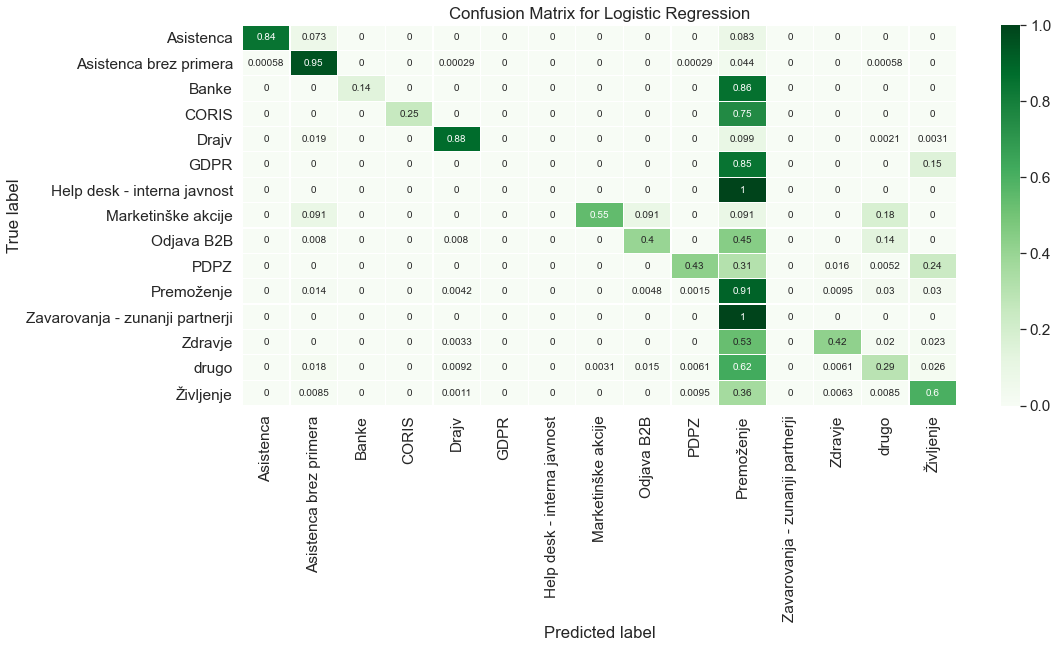

CPU times: user 4min 43s, sys: 7.76 s, total: 4min 50s
Wall time: 2min 35s


In [40]:
%%time

#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=None, C=10, solver='lbfgs', max_iter=500)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = my_tags
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks + 0.5, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Izvoz grafov in tabel pojavnosti besed po kategorijah

Za začetno analizo besed v posameznih kategorijah sva izvozila grafe in tabelarne prikaze najpogostejših besed po posameznih kategorijah. 

In [41]:
df = df.drop(columns=["content", "no_stopwords","no_digits", "counted","tokenized"])

In [42]:
df

,class,detoken
0,Asistenca,obveščamo vas kreiranja primera cudv črna na k...
1,Asistenca,obveščamo vas kreiranja primera david seč vpra...
2,Asistenca,vv od poslano četrtek januar za dc zadeva exis...
3,Asistenca,obveščamo vas kreiranja primera aleš ruter vpr...
4,Asistenca,obveščamo vas kreiranja primera summit leasing...
...,...,...
36124,Življenje,html head xd meta http equiv content type cont...
36125,Življenje,html head xd meta http equiv content type cont...
36126,Življenje,pozdravljeni prosim podatek kdaj lahko dobim i...
36127,Življenje,pozdravljeni prejšnji delodajalec vplačeval sk...


In [45]:
#FUNKCIJA PREJME DATAFRAME Z RAZREDI IN DETOKENIZIRANIMI BESEDAMI - DRUG COLUMN JE SEZNAM BESED

def df_to_plots_table(vnos):

    #SPODNJA VRSTICA SPREMENI DATAFRAME V SLOVAR, KJER SO RAZREDU KLJUČI, VREDNOSTI PA VSE BESEDE
    slovar = vnos.groupby('class').apply(lambda dfg: dfg.drop('class', axis=1).to_dict(orient='list')).to_dict()
    
    from nltk.probability import FreqDist
    import matplotlib
    from matplotlib import pyplot as plt
    from matplotlib.font_manager import FontProperties

    
    %matplotlib inline
    
    my_tags= ['Asistenca',
             'Asistenca brez primera',
             'Banke',
             'CORIS',
             'Drajv',
             'GDPR',
             'Help desk - interna javnost',
             'Marketinške akcije',
             'Odjava B2B',
             'PDPZ',
             'Premoženje',
             'Zavarovanja - zunanji partnerji',
             'Zdravje',
             'drugo',
             'Življenje']
    
    for oznaka in my_tags:
        print(oznaka)
        seznam = (slovar[oznaka][vnos.columns[1]])
        besedilo = " ".join(seznam)
        besedilo = besedilo.split(" ")
        
        fdist = FreqDist()
        for beseda in besedilo:
            fdist[beseda]+=1
        
        
        fig = plt.figure(figsize=(22, 10))
        plt.title(oznaka)
        slika = fdist.plot(60)
        fdist_top60 = fdist.most_common(20)
        
        
        N = 8
        
        figa, ax1 = plt.subplots(figsize=(6, 2 + N / 2.5))
        title = oznaka
        ax1.set_title(f'{title}', weight='bold', size=14, color='k')
        
        table = plt.table(cellText = fdist_top60, 
                          colLabels = ('Beseda', 'Pojavnost'),
                          loc='center',
                          cellLoc='center')
        
        for (row, col), cell in table.get_celld().items():
            if (row == 0):
                cell.set_text_props(fontproperties=FontProperties(weight='bold'))
        
        table.set_fontsize(8)
        ax1.axis('off')
        
        plt.axis('off')
        plt.grid('off')
          
        #prepare for saving:
        # draw canvas once
        plt.gcf().canvas.draw()
        # get bounding box of table
        points = table.get_window_extent(plt.gcf()._cachedRenderer).get_points()
        # add 10 pixel spacing
        points[0,:] -= 10; points[1,:] += 10
        # get new bounding box in inches
        nbbox = matplotlib.transforms.Bbox.from_extents(points/plt.gcf().dpi)
             
        # save and clip by new bounding box
        plt.savefig(oznaka+"_table_0530_zacetna.jpg", dpi=200, bbox_inches='tight')
        
        print(slika)
        print(fdist_top60)
        fig.savefig(oznaka + '_0530_zacetna.jpg',dpi=300)

Asistenca


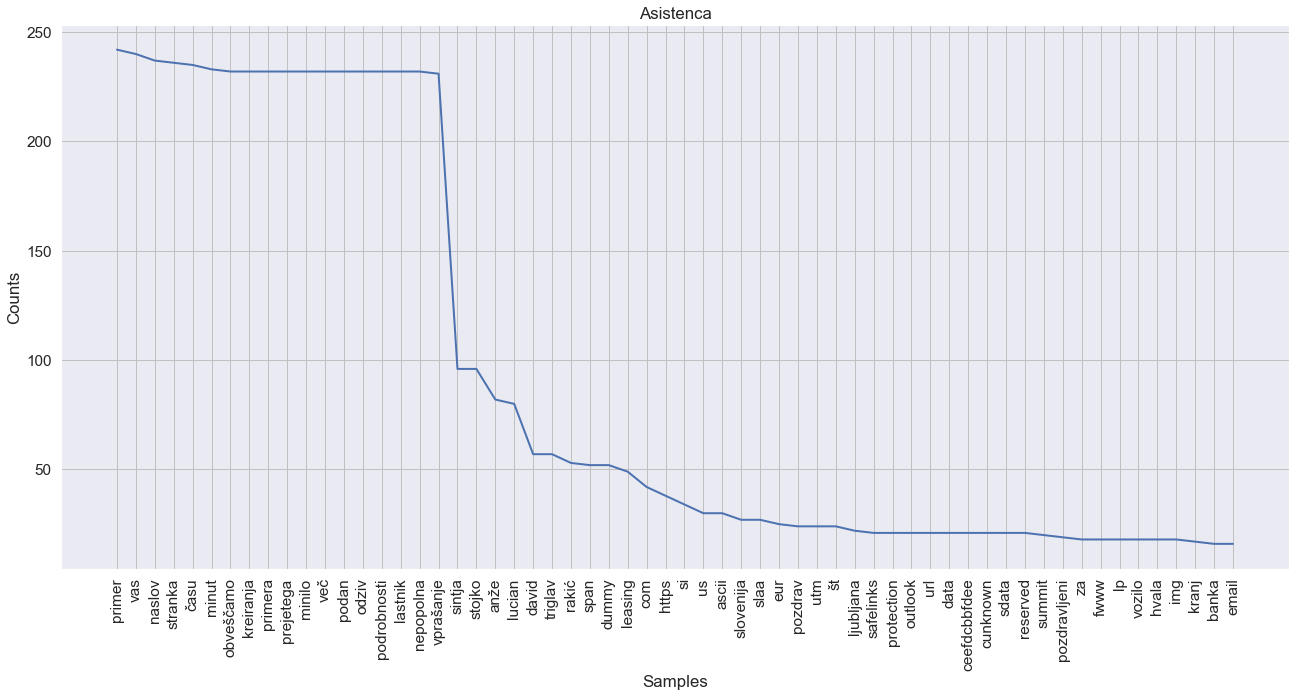

AxesSubplot(0.125,0.125;0.775x0.755)
[('primer', 242), ('vas', 240), ('naslov', 237), ('stranka', 236), ('času', 235), ('minut', 233), ('obveščamo', 232), ('kreiranja', 232), ('primera', 232), ('prejetega', 232), ('minilo', 232), ('več', 232), ('podan', 232), ('odziv', 232), ('podrobnosti', 232), ('lastnik', 232), ('nepopolna', 232), ('vprašanje', 231), ('sintja', 96), ('stojko', 96)]
Asistenca brez primera


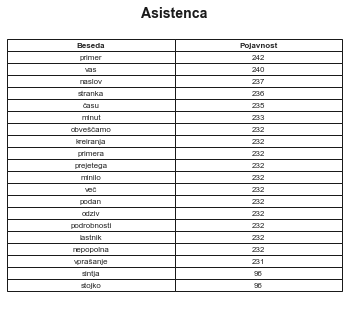

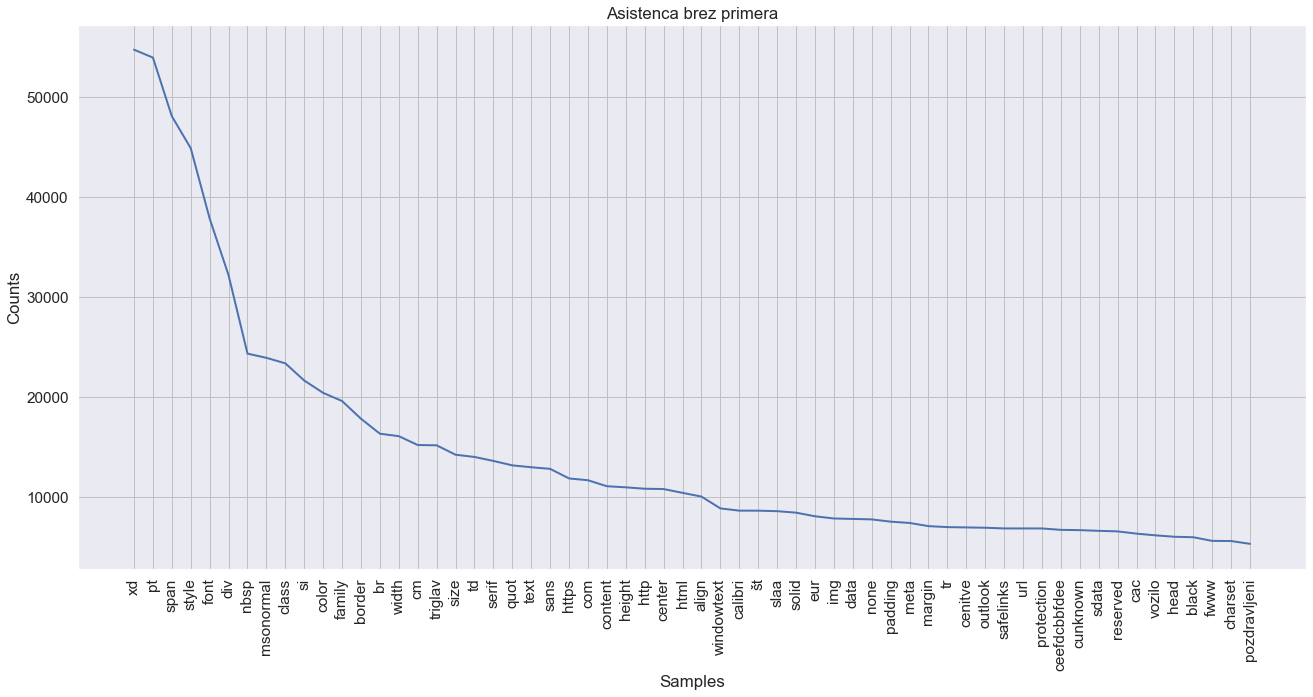

AxesSubplot(0.125,0.125;0.775x0.755)
[('xd', 54736), ('pt', 53943), ('span', 48087), ('style', 44889), ('font', 37862), ('div', 32196), ('nbsp', 24365), ('msonormal', 23947), ('class', 23396), ('si', 21680), ('color', 20444), ('family', 19630), ('border', 17861), ('br', 16365), ('width', 16119), ('cm', 15234), ('triglav', 15205), ('size', 14266), ('td', 14043), ('serif', 13645)]
Banke


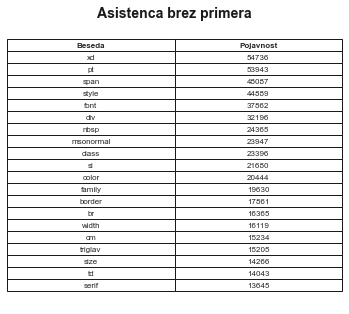

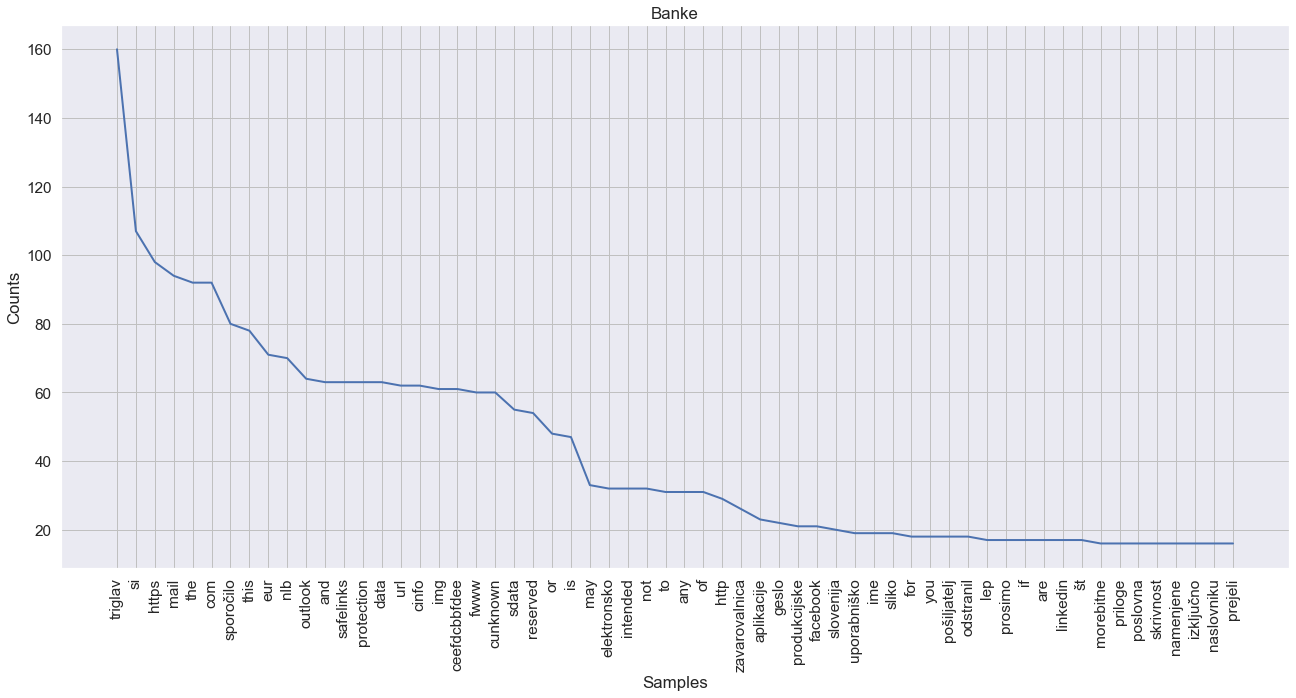

AxesSubplot(0.125,0.125;0.775x0.755)
[('triglav', 160), ('si', 107), ('https', 98), ('mail', 94), ('the', 92), ('com', 92), ('sporočilo', 80), ('this', 78), ('eur', 71), ('nlb', 70), ('outlook', 64), ('and', 63), ('safelinks', 63), ('protection', 63), ('data', 63), ('url', 62), ('cinfo', 62), ('img', 61), ('ceefdcbbfdee', 61), ('fwww', 60)]
CORIS


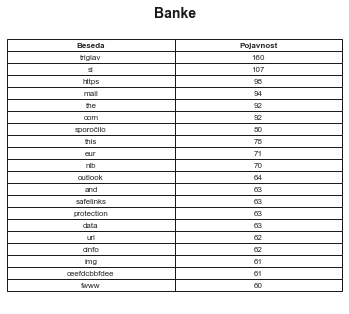

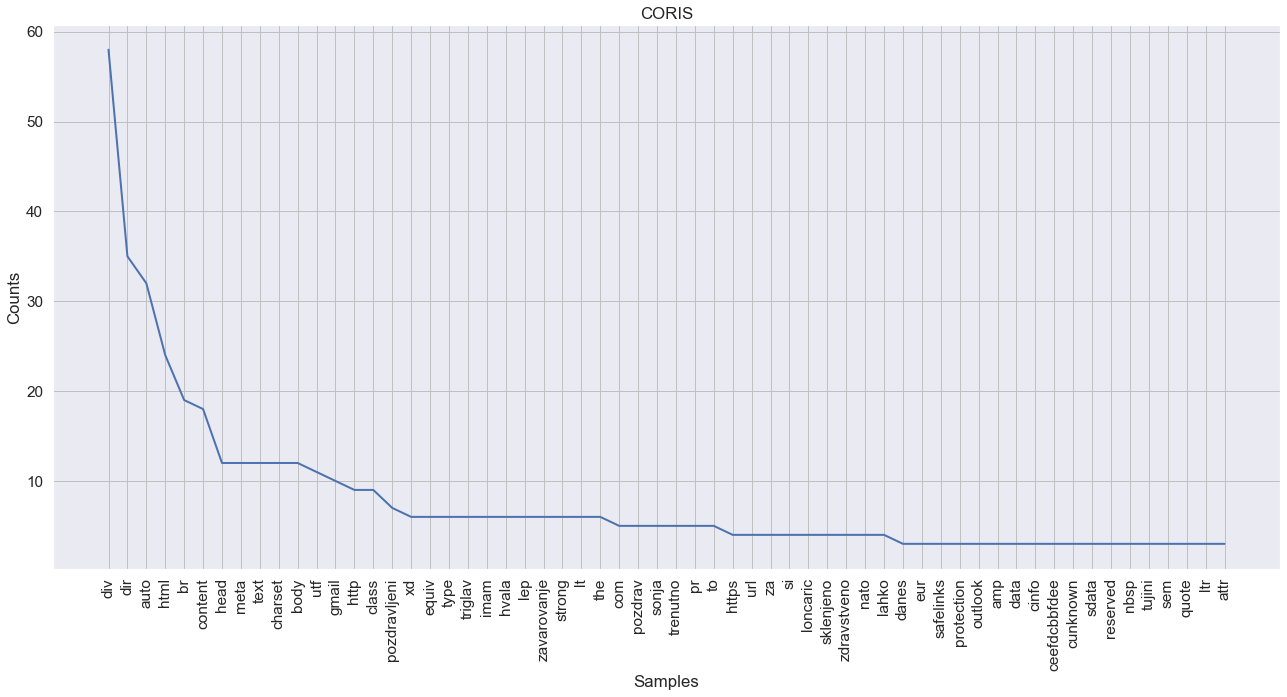

AxesSubplot(0.125,0.125;0.775x0.755)
[('div', 58), ('dir', 35), ('auto', 32), ('html', 24), ('br', 19), ('content', 18), ('head', 12), ('meta', 12), ('text', 12), ('charset', 12), ('body', 12), ('utf', 11), ('gmail', 10), ('http', 9), ('class', 9), ('pozdravljeni', 7), ('xd', 6), ('equiv', 6), ('type', 6), ('triglav', 6)]
Drajv


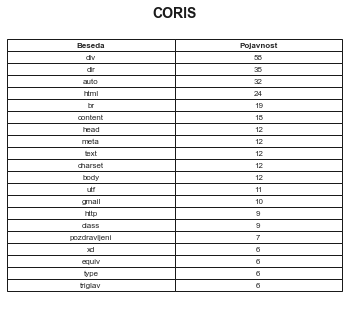

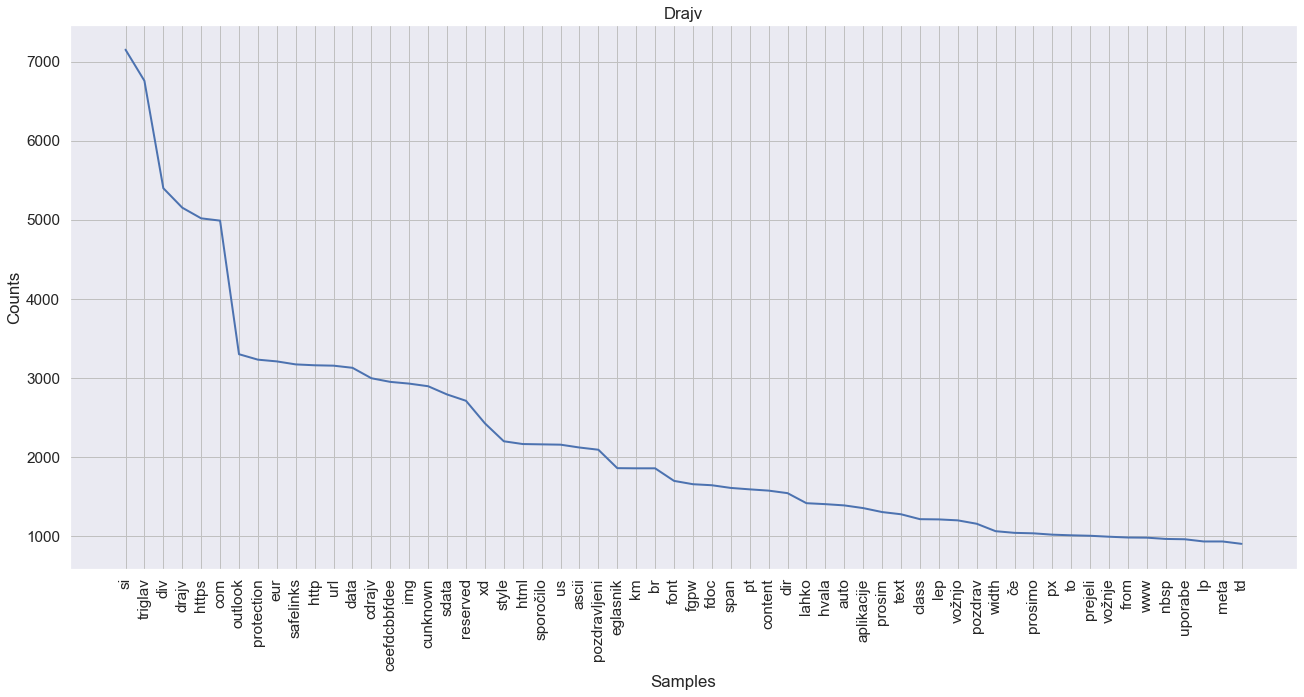

AxesSubplot(0.125,0.125;0.775x0.755)
[('si', 7150), ('triglav', 6756), ('div', 5398), ('drajv', 5152), ('https', 5017), ('com', 4988), ('outlook', 3299), ('protection', 3230), ('eur', 3208), ('safelinks', 3170), ('http', 3159), ('url', 3154), ('data', 3127), ('cdrajv', 2995), ('ceefdcbbfdee', 2949), ('img', 2927), ('cunknown', 2894), ('sdata', 2790), ('reserved', 2710), ('xd', 2425)]
GDPR


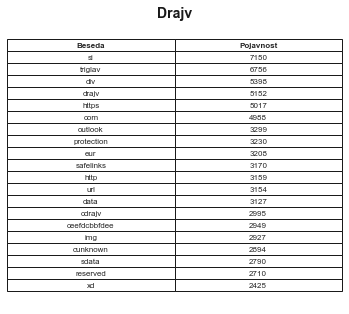

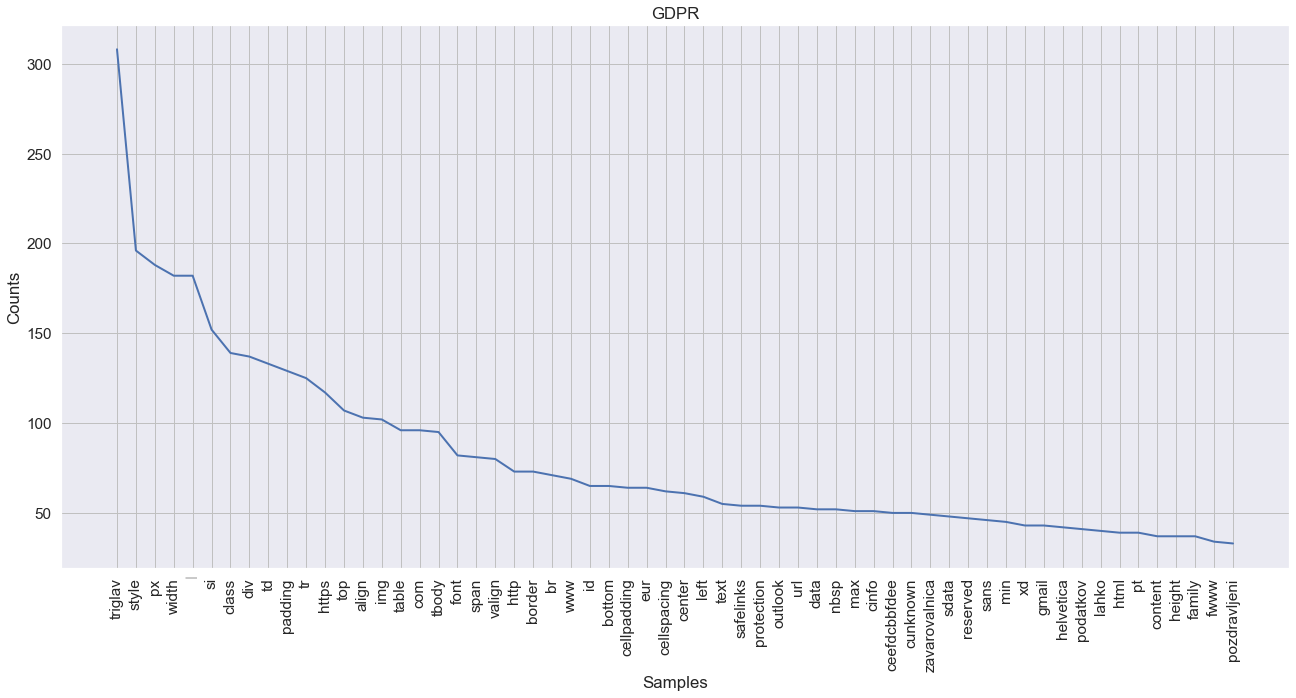

AxesSubplot(0.125,0.125;0.775x0.755)
[('triglav', 308), ('style', 196), ('px', 188), ('width', 182), ('\u200c', 182), ('si', 152), ('class', 139), ('div', 137), ('td', 133), ('padding', 129), ('tr', 125), ('https', 117), ('top', 107), ('align', 103), ('img', 102), ('table', 96), ('com', 96), ('tbody', 95), ('font', 82), ('span', 81)]
Help desk - interna javnost


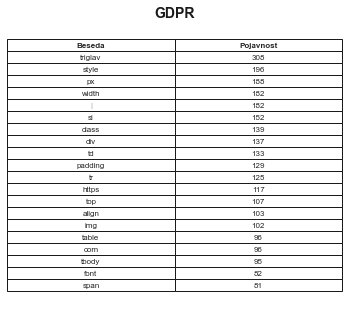

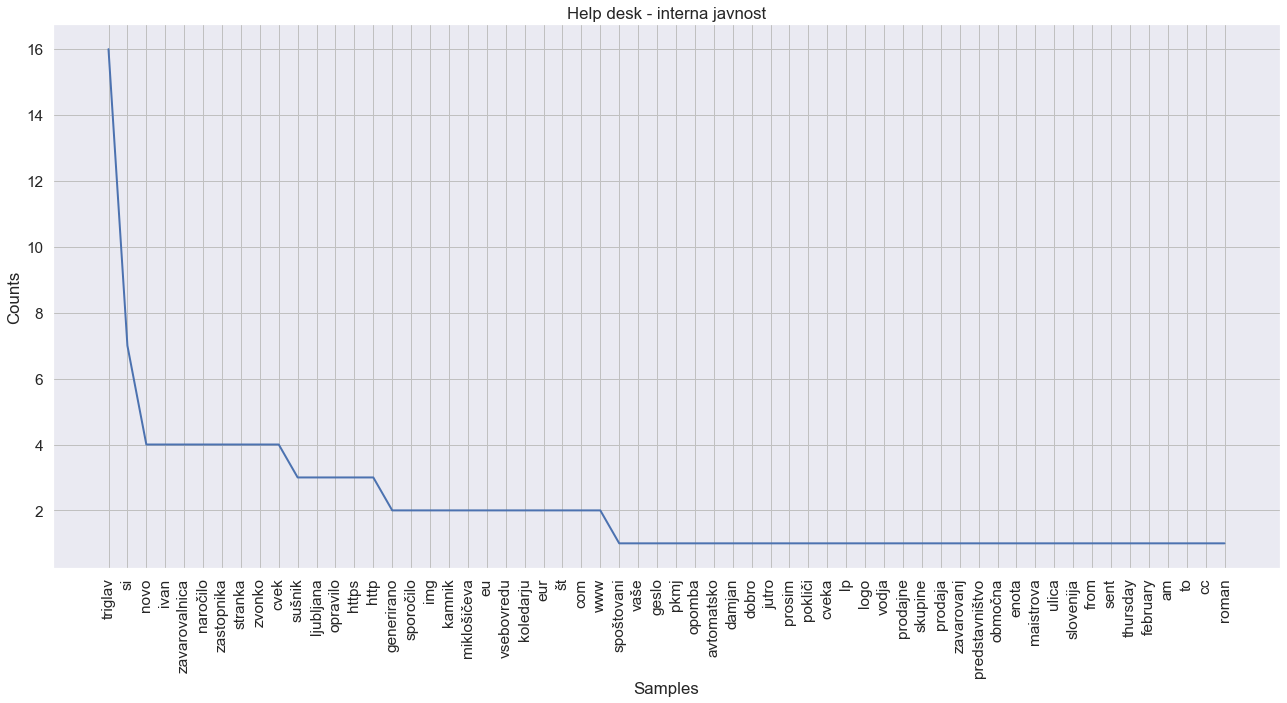

AxesSubplot(0.125,0.125;0.775x0.755)
[('triglav', 16), ('si', 7), ('novo', 4), ('ivan', 4), ('zavarovalnica', 4), ('naročilo', 4), ('zastopnika', 4), ('stranka', 4), ('zvonko', 4), ('cvek', 4), ('sušnik', 3), ('ljubljana', 3), ('opravilo', 3), ('https', 3), ('http', 3), ('generirano', 2), ('sporočilo', 2), ('img', 2), ('kamnik', 2), ('miklošičeva', 2)]
Marketinške akcije


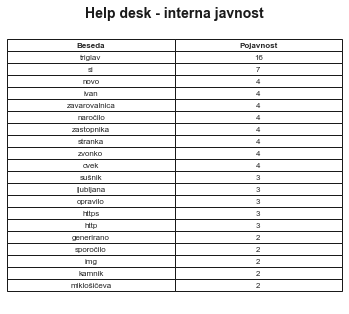

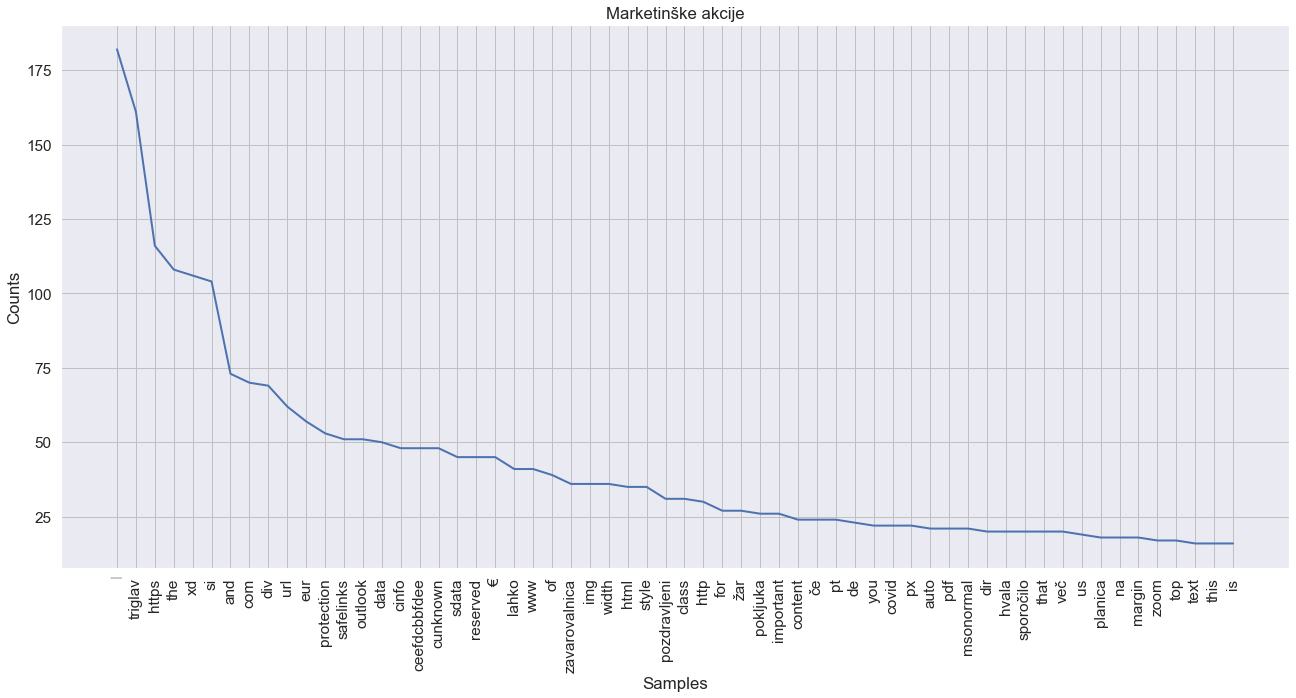

AxesSubplot(0.125,0.125;0.775x0.755)
[('\u200c', 182), ('triglav', 161), ('https', 116), ('the', 108), ('xd', 106), ('si', 104), ('and', 73), ('com', 70), ('div', 69), ('url', 62), ('eur', 57), ('protection', 53), ('safelinks', 51), ('outlook', 51), ('data', 50), ('cinfo', 48), ('ceefdcbbfdee', 48), ('cunknown', 48), ('sdata', 45), ('reserved', 45)]
Odjava B2B


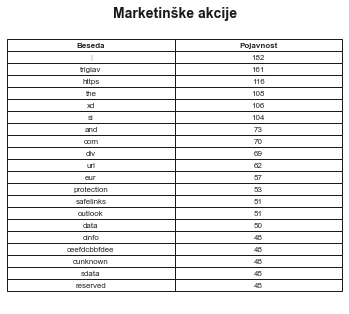

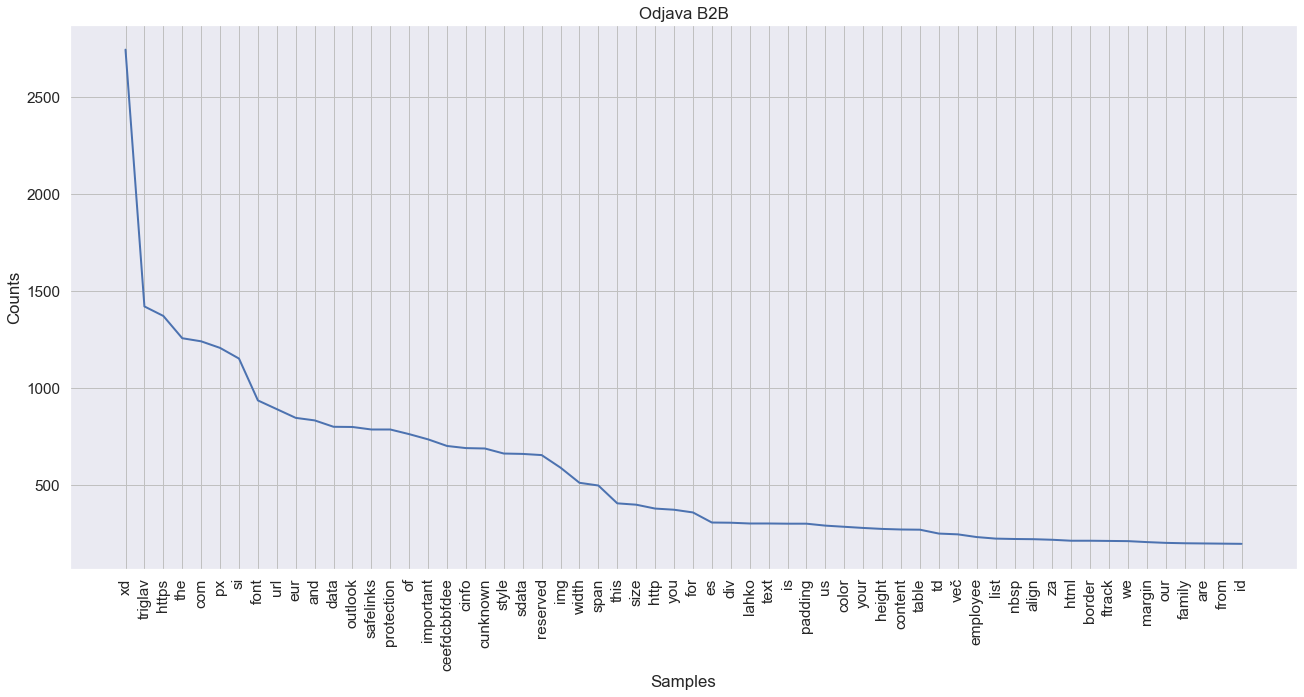

AxesSubplot(0.125,0.125;0.775x0.755)
[('xd', 2746), ('triglav', 1421), ('https', 1372), ('the', 1257), ('com', 1241), ('px', 1207), ('si', 1152), ('font', 936), ('url', 891), ('eur', 846), ('and', 833), ('data', 800), ('outlook', 799), ('safelinks', 786), ('protection', 786), ('of', 762), ('important', 735), ('ceefdcbbfdee', 701), ('cinfo', 690), ('cunknown', 688)]
PDPZ


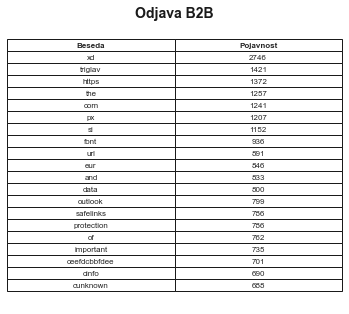

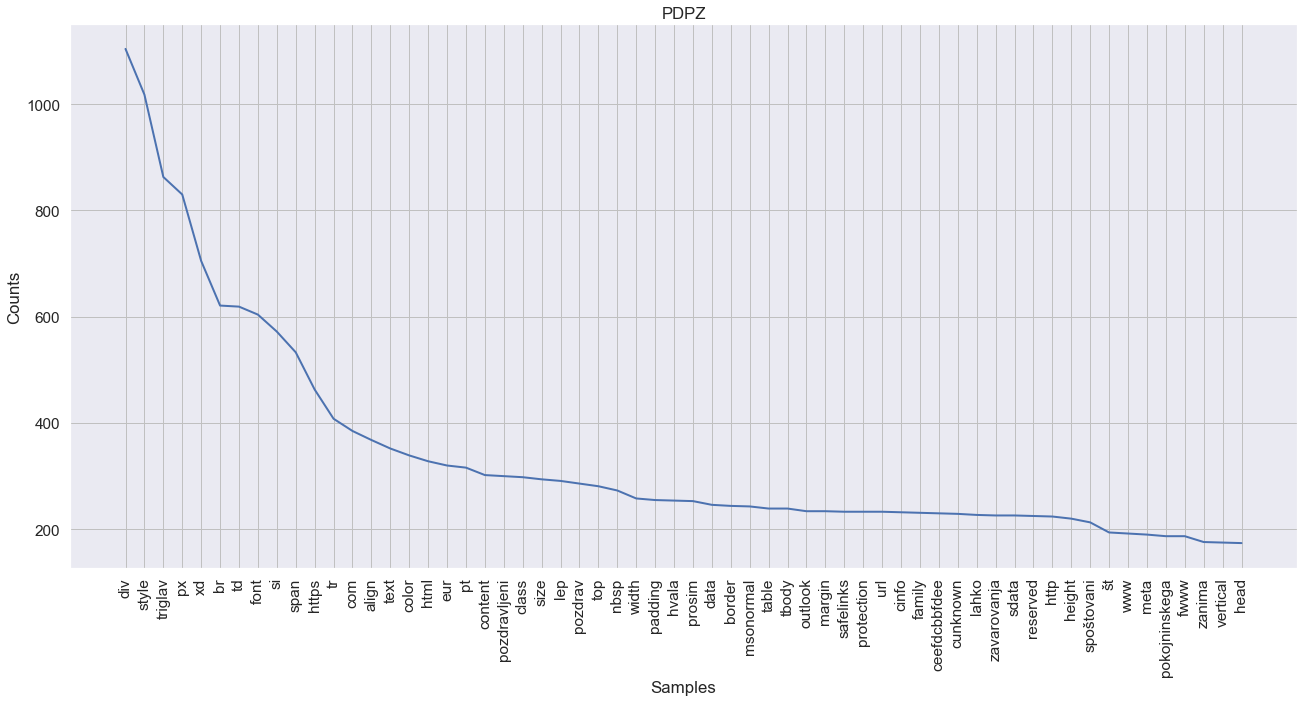

AxesSubplot(0.125,0.125;0.775x0.755)
[('div', 1104), ('style', 1018), ('triglav', 863), ('px', 830), ('xd', 705), ('br', 621), ('td', 619), ('font', 604), ('si', 572), ('span', 533), ('https', 463), ('tr', 408), ('com', 385), ('align', 368), ('text', 352), ('color', 339), ('html', 328), ('eur', 320), ('pt', 316), ('content', 302)]
Premoženje


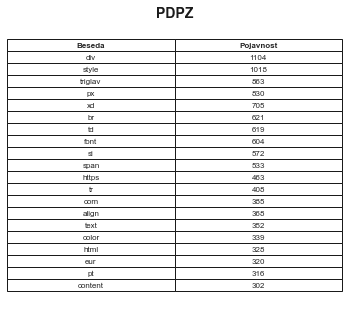

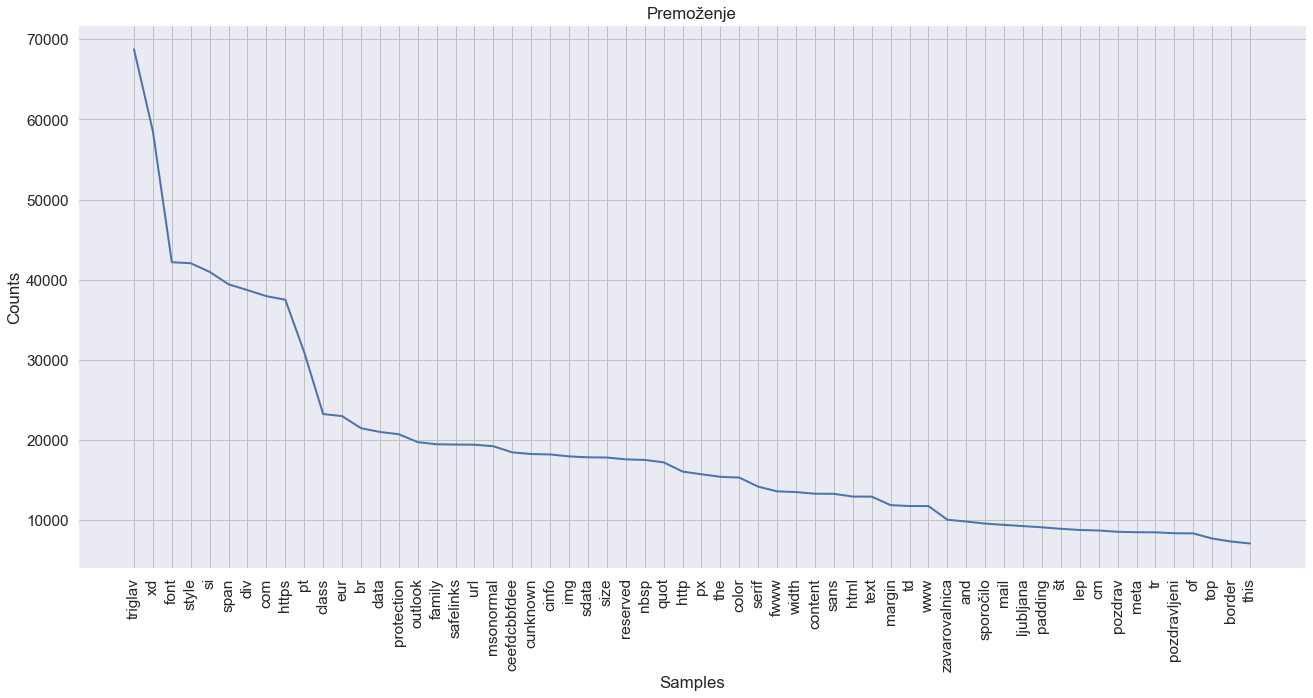

AxesSubplot(0.125,0.125;0.775x0.755)
[('triglav', 68762), ('xd', 58510), ('font', 42182), ('style', 42057), ('si', 40978), ('span', 39423), ('div', 38701), ('com', 37946), ('https', 37501), ('pt', 30940), ('class', 23229), ('eur', 22978), ('br', 21466), ('data', 20998), ('protection', 20712), ('outlook', 19729), ('family', 19460), ('safelinks', 19423), ('url', 19406), ('msonormal', 19212)]
Zavarovanja - zunanji partnerji


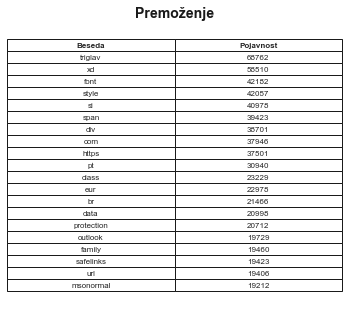

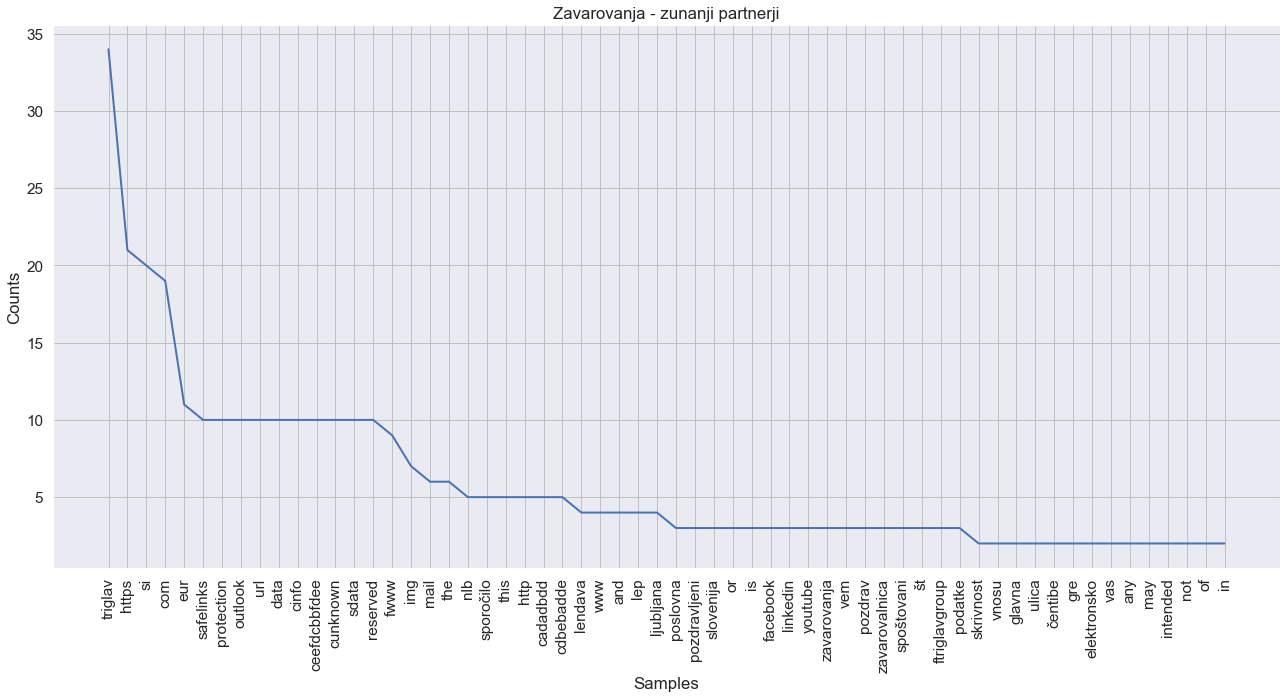

AxesSubplot(0.125,0.125;0.775x0.755)
[('triglav', 34), ('https', 21), ('si', 20), ('com', 19), ('eur', 11), ('safelinks', 10), ('protection', 10), ('outlook', 10), ('url', 10), ('data', 10), ('cinfo', 10), ('ceefdcbbfdee', 10), ('cunknown', 10), ('sdata', 10), ('reserved', 10), ('fwww', 9), ('img', 7), ('mail', 6), ('the', 6), ('nlb', 5)]
Zdravje


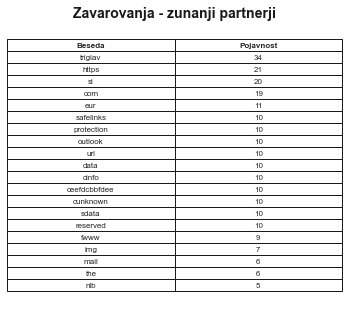

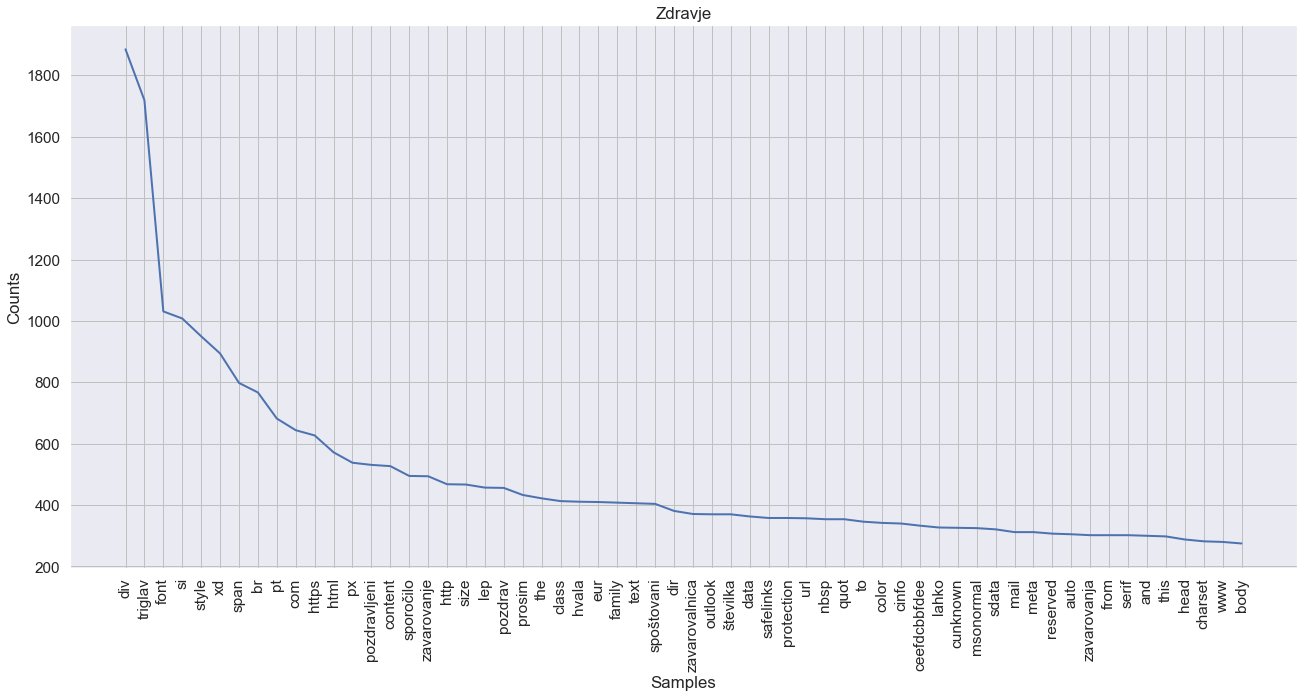

AxesSubplot(0.125,0.125;0.775x0.755)
[('div', 1885), ('triglav', 1719), ('font', 1031), ('si', 1008), ('style', 950), ('xd', 894), ('span', 798), ('br', 767), ('pt', 682), ('com', 644), ('https', 627), ('html', 572), ('px', 538), ('pozdravljeni', 531), ('content', 527), ('sporočilo', 495), ('zavarovanje', 494), ('http', 468), ('size', 467), ('lep', 457)]
drugo


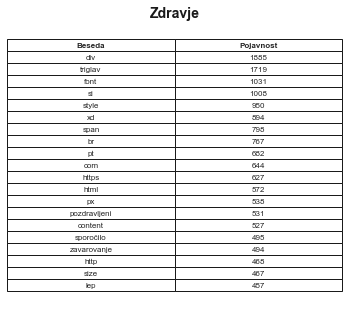

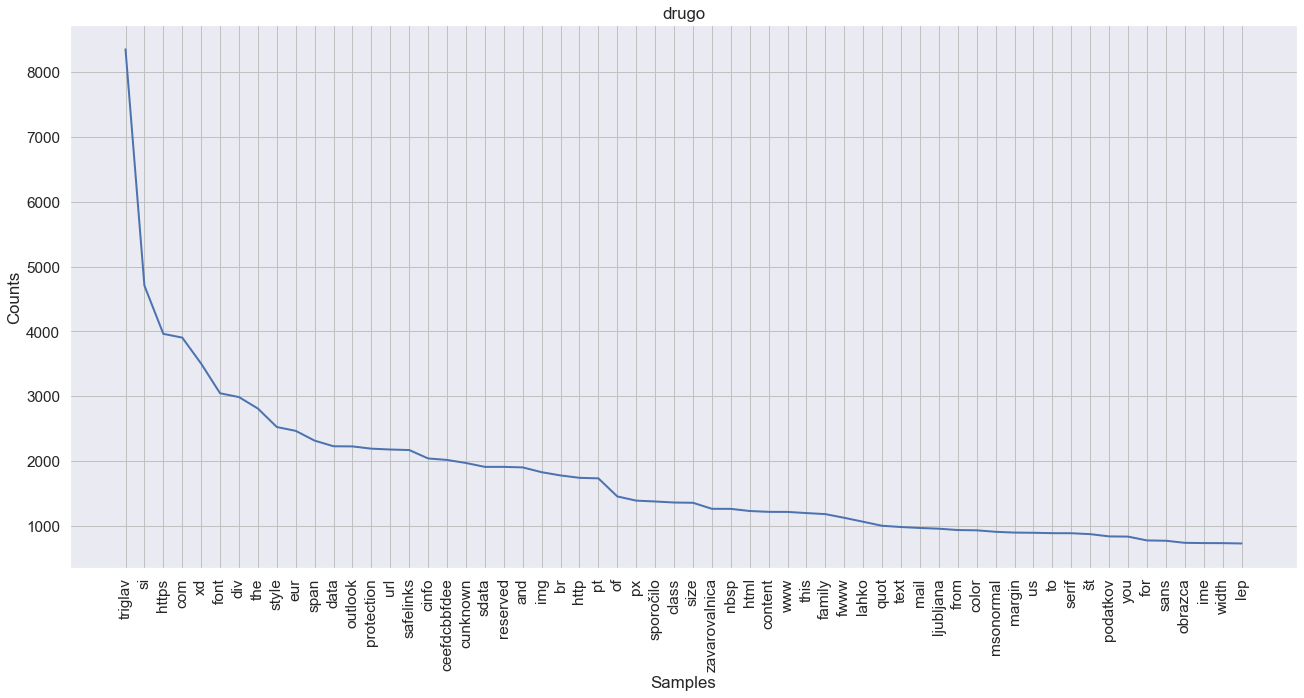

AxesSubplot(0.125,0.125;0.775x0.755)
[('triglav', 8355), ('si', 4708), ('https', 3963), ('com', 3905), ('xd', 3503), ('font', 3046), ('div', 2987), ('the', 2810), ('style', 2525), ('eur', 2466), ('span', 2315), ('data', 2228), ('outlook', 2226), ('protection', 2191), ('url', 2178), ('safelinks', 2170), ('cinfo', 2040), ('ceefdcbbfdee', 2017), ('cunknown', 1970), ('sdata', 1910)]
Življenje


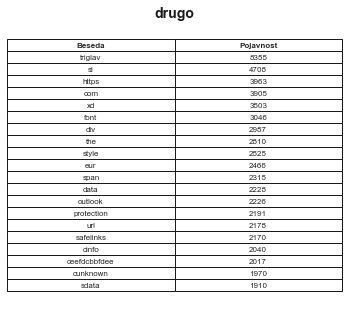

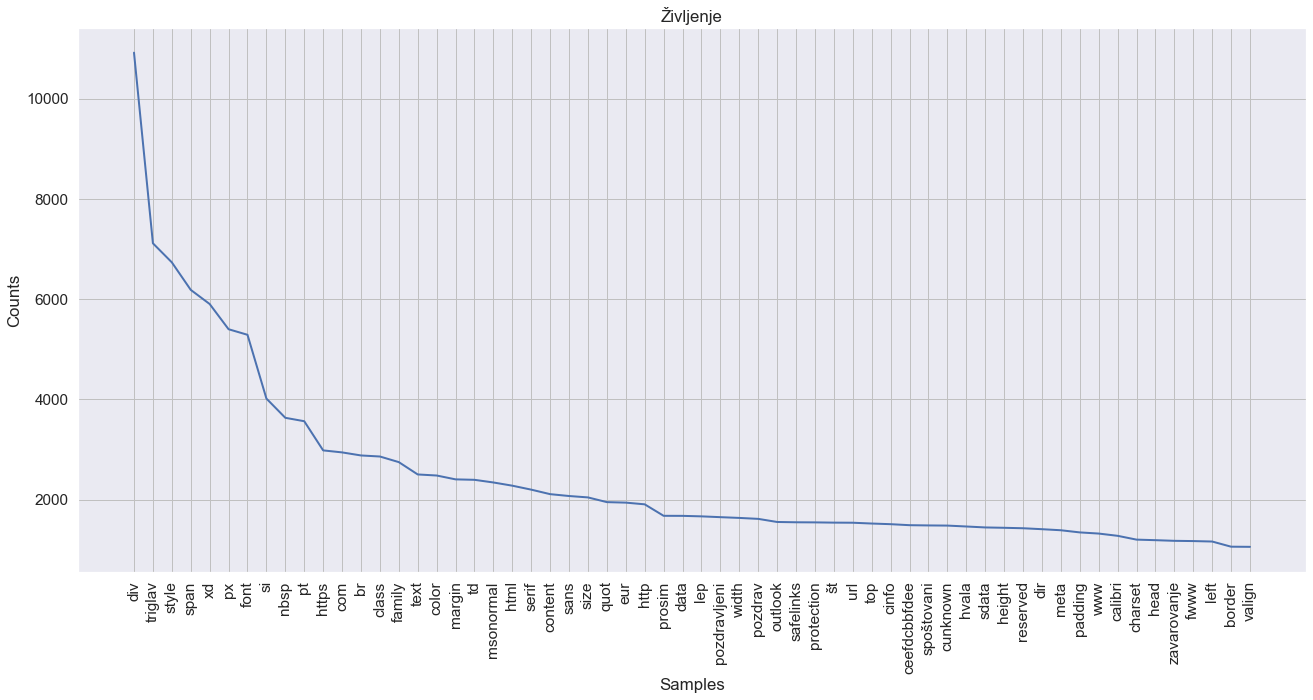

AxesSubplot(0.125,0.125;0.775x0.755)
[('div', 10917), ('triglav', 7114), ('style', 6734), ('span', 6185), ('xd', 5903), ('px', 5400), ('font', 5289), ('si', 4017), ('nbsp', 3633), ('pt', 3565), ('https', 2983), ('com', 2943), ('br', 2882), ('class', 2861), ('family', 2749), ('text', 2503), ('color', 2482), ('margin', 2405), ('td', 2396), ('msonormal', 2343)]


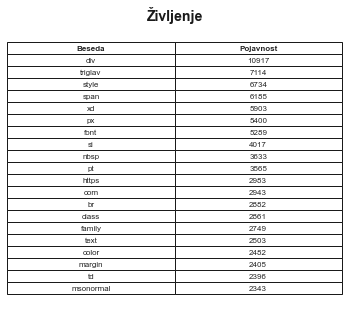

In [46]:
df_to_plots_table(df)